## Linear Discriminant Analysis(LDA)

Linear Discriminant Analysis or LDA is a technique to classify an object into one of two or more groups depending on a set of features that describes that object. It does so by assigning the object to the group with the highest conditional probability. Remember Bayes Rule? This is exactly that.

LDA is an extension to logistic regression. Here the distribution of the predictors X is modeled separately in each of the
response classes (i.e. given Y), and then Bayes’ theorem is used to flip these observations around into estimates for $Pr(Y = k\ |\ X = x)$.


**Using Bayes’ Theorem for Classification**

Suppose there are k(k>=2) classesk>=2 such that we want an observation to be classified into. The response variable Y can take on K possible distinct and unordered values. Let $π_k$ represent the prior probability that a randomly chosen observation comes from the kth class. This is the probability that a given observation is associated with the $k_{th}$ category of the response variable Y . Let $f_k(X) ≡ Pr(X = x|Y = k)$ denote the density function of $X$ for an observation that comes from the $k_{th}$ class. In other words, $f_k(x)$ is relatively large if there is a high probability that an observation in the $k_{th}$ class has X ≈ x, and fk(x) is small if it is very unlikely that an observation in the kth class has X ≈ x. Then Bayes’ theorem states that

$$ Pr(Y = k\ |\ X = x) = \frac{π_k f_k(x)}{\sum_{l=1}^{K} π_l f_l(x)}$$

If the above equation is represented using the notation used for logistic regression we will get something like $p_k(X) = Pr(Y = k\ |\ X)$. This means instead of directly computing $p_k(X)$, we can simply plug in estimates of $π_k$ and $f_k(X)$ into above complicated looking equation. Estimating $π_k$ is easy if we have a random sample of Ys from the population. We compute the fraction of the training observations that belong to the kth class. 

Estimating $f_k(X)$ is a bit more challenging, $p_k(x)$ is the posterior probability that an observation $X\ =\ x$ belongs to the $k_{th}$ class. That is, it is the probability that the observation belongs to the $k_{th}$ class, given the predictor value for that observation. Bayes classifier, classifies an observation to the class for which $p_k(X)$ is largest, has the lowest possible error rate out of all classifiers.


----
We will evaluate the performance of LDA over logistic regression. Use Smarket dataset again to predict Direction. Fit a LDA model using the lda() function, which is part of the MASS library. Notice that the lda() syntax for the lda() function is identical to that of lm(), and to that of glm() except for the absence of the family option. 

We are going to train the model on those observations that occurred before the year 2005, and predict for those observations during 2005.


In [3]:
library(ISLR)
attach(Smarket)
head(Smarket)
# The object train is a vector of 1,250 elements, corresponding to the observations in our data set. The elements of the 
# vector that correspond to observations that occurred before 2005 are set to TRUE as they satisfy the condition. 
# whereas those that correspond to observations in 2005 are set to FALSE. 
train = Year<2005

# train is a Boolean vector, since its elements are TRUE and FALSE. So the TRUE and FALSE values corresponding to each row
# will let you subset rows or columns of a matrix. For instance, the command Smarket[!train,] would pick out a submatrix of the
# stock market dataset, corresponding to dates in 2005, since those are the ones for which the elements of train are FALSE and 
# `!` operator will reverse the elements of train vector.
Smarket.2005= Smarket[!train,]

# Check the dimensions of Smarket.2005
dim(Smarket.2005)

# Save the Direction values corresponding to 2005 dates.
Direction.2005 = Direction[!train]

The following objects are masked from Smarket (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Smarket (pos = 4):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up


[1] 252   9

In [5]:
library(MASS)
lda.fit=lda(Direction~Lag1+Lag2 ,data=Smarket ,subset=train)
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

The model output indicates that $\hat{π}_1$ = 0.492 and $\hat{π}_2$ = 0.508 i'e 49.2% of the observations correspond to days during which the market went down. These are the average probabilities of each predictor within each class, and are used by LDA as estimates of μk. 

The probabilities suggest there is a tendency for the last 2 days’ returns to be negative on days when the market increases and a tendency for the last 2 days’ returns to be positive on days when the market declines. The coefficients of linear discriminants output are used to form the LDA decision rule. If −0.642×Lag1−0.514×Lag2 is large, then the LDA classifier will predict a market increase, and if it is small, then the LDA classifier will predict a market decline. The plot() function produces plots of the linear discriminants, obtained by computing −0.642 × Lag1 − 0.514 × Lag2 for each of the training observations.

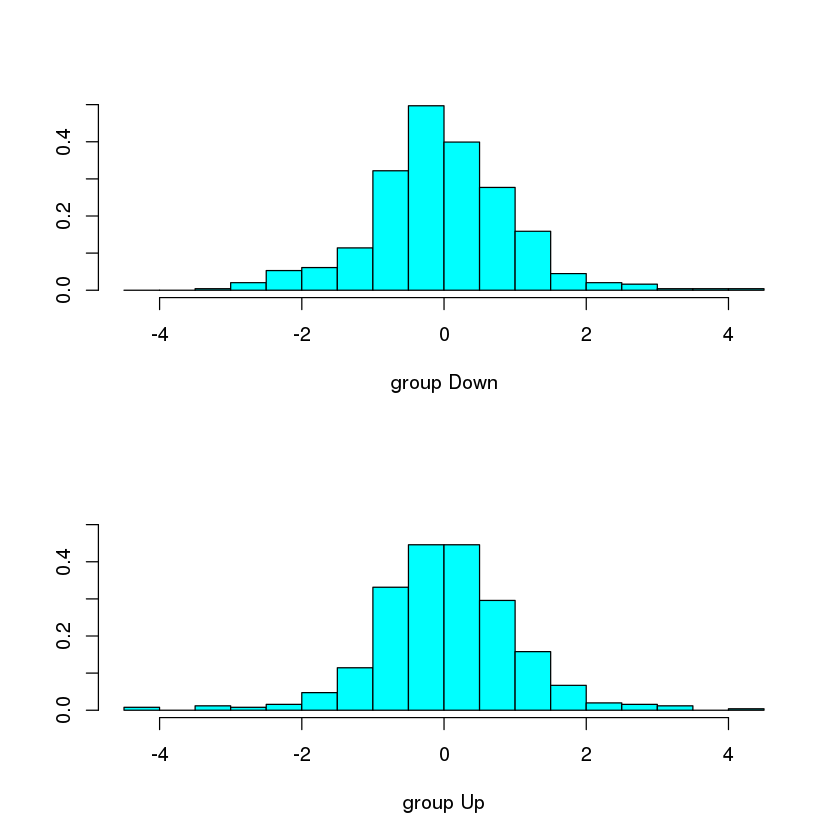

In [6]:
plot(lda.fit)

The predict() function returns a list with three elements. The first element, class, contains LDA’s predictions about the movement of the market. The second element, posterior, is a matrix whose kth column contains the posterior probability that the corresponding observation belongs to the kth class. Finally, x contains the linear discriminants.

In [12]:
lda.pred=predict(lda.fit, Smarket.2005)
names(lda.pred)

[1] "class"     "posterior" "x"

In [13]:
lda.class =lda.pred$class
table(lda.class ,Direction.2005)

mean(lda.class == Direction.2005)

         Direction.2005
lda.class Down  Up
     Down   35  35
     Up     76 106

[1] 0.5595238

Applying a 50% threshold to the posterior probabilities allows us to recreate the predictions contained in lda.pred$class

In [14]:
sum(lda.pred$posterior[ ,1]>=0.5)

sum(lda.pred$posterior[,1]<0.5)

[1] 70

[1] 182

In [15]:
lda.pred$posterior[1:20 ,1]
lda.class[1:20]

999      1000      1001      1002      1003      1004      1005      1006 
0.4901792 0.4792185 0.4668185 0.4740011 0.4927877 0.4938562 0.4951016 0.4872861 
     1007      1008      1009      1010      1011      1012      1013      1014 
0.4907013 0.4844026 0.4906963 0.5119988 0.4895152 0.4706761 0.4744593 0.4799583 
     1015      1016      1017      1018 
0.4935775 0.5030894 0.4978806 0.4886331

[1] Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Down Up   Up   Up  
[16] Up   Up   Down Up   Up  
Levels: Down Up

If we wanted to use a posterior probability threshold other than 50% in order to make predictions, then we could easily do so. For instance, suppose that we wish to predict a market decrease only if we are very certain that the market will indeed decrease on that day—say, if the posterior probability is at least 90%.

In [16]:
sum(lda.pred$posterior[,1]>.9)

[1] 0

No days in 2005 meet that threshold! In fact, the greatest posterior probability of decrease in all of 2005 was 52.02%.